In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import seaborn as sns

## Read in merged weather / taxi data

In [2]:
chunklist = []
for chunk in pd.read_csv('capstone_data.csv', chunksize = 100000):
    chunklist.append(chunk)

In [3]:
df = pd.concat(chunklist)

In [4]:
df.head()

,pickup,day,month,weekday,hour,trip_time,trip_distance,avg_speed,passenger_count,RatecodeID,...,Unknown,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,tip_p,tip_amount
0,2016-01-01 00:00:04,1,1,4,0,0.241111,3.7,15.345622,1,1,...,0,1,14.0,0.5,0.5,0.0,0.3,18.35,0.199346,3.05
1,2016-01-01 00:00:19,1,1,4,0,0.320556,3.4,10.606586,1,1,...,0,2,14.5,0.5,0.5,0.0,0.3,15.80,0.000000,0.00
2,2016-01-01 00:00:52,1,1,4,0,0.482778,3.1,6.421174,2,1,...,0,1,19.5,0.5,0.5,0.0,0.3,24.95,0.199519,4.15
3,2016-01-01 00:00:56,1,1,4,0,0.274444,5.7,20.769231,1,1,...,0,1,18.0,0.5,0.5,10.5,0.3,37.80,0.268456,8.00
4,2016-01-01 00:01:38,1,1,4,0,0.082222,1.2,14.594595,1,1,...,0,1,6.0,0.5,0.5,0.0,0.3,8.75,0.198630,1.45


In [5]:
df['pickup'] = pd.to_datetime(df['pickup'])

In [6]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790100 entries, 0 to 5790099
Data columns (total 48 columns):
pickup                   5790100 non-null datetime64[ns]
day                      5790100 non-null int64
month                    5790100 non-null int64
weekday                  5790100 non-null int64
hour                     5790100 non-null int64
trip_time                5790100 non-null float64
trip_distance            5790100 non-null float64
avg_speed                5790100 non-null float64
passenger_count          5790100 non-null int64
RatecodeID               5790100 non-null int64
tempm                    5790100 non-null float64
dewptm                   5790100 non-null float64
hum                      5790100 non-null float64
wspdi                    5790100 non-null float64
visi                     5790100 non-null float64
pressurem                5790100 non-null float64
precipm                  5790100 non-null float64
conds                    5790100 non-null 

In [7]:
test = df.head(100)

In [8]:
sns.pairplot(test)

## Let's use this sample pairplot to explore some the data more closely.

Text(0, 0.5, 'Frequency')

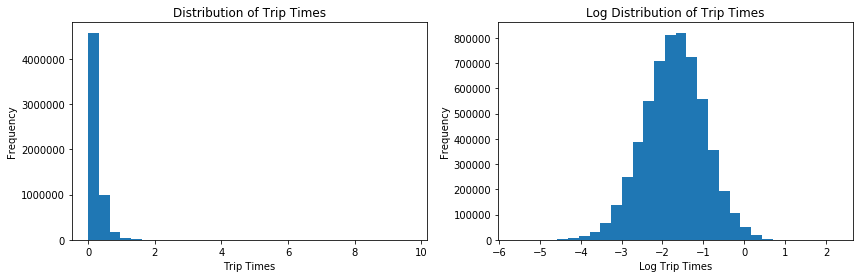

In [9]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
plt.hist(df.trip_time, bins = 30)
plt.title('Distribution of Trip Times')
plt.xlabel('Trip Times')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(np.log(df.trip_time), bins = 30)
plt.title('Log Distribution of Trip Times')
plt.xlabel('Log Trip Times')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

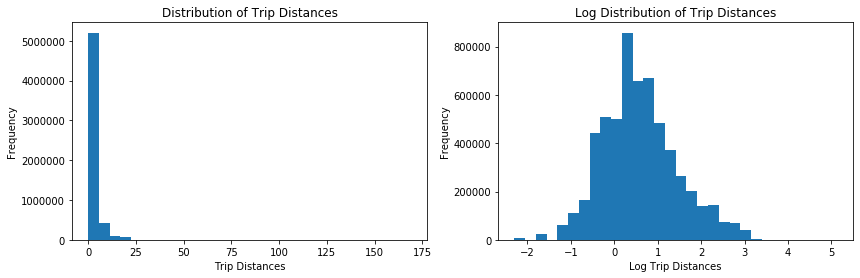

In [10]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
plt.hist(df.trip_distance, bins = 30)
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distances')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(np.log(df.trip_distance), bins = 30)
plt.title('Log Distribution of Trip Distances')
plt.xlabel('Log Trip Distances')
plt.ylabel('Frequency')

### The distributions for the taxi trip times and distances are both heavily right skewed, but plotting the log gives us something of a normal distribution.

## Let's take a closer look at the relationship between the tip amount / percentage and various other features.

Text(0.5, 1.0, 'Tip Percentage vs Tip Amount')

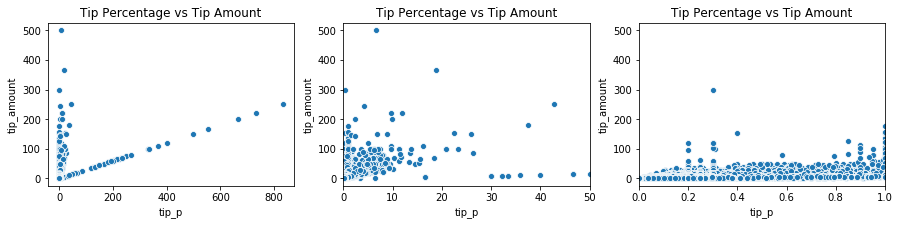

In [11]:
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)
sns.scatterplot('tip_p', 'tip_amount', data = df)
plt.title('Tip Percentage vs Tip Amount')

plt.subplot(1,3,2)
sns.scatterplot('tip_p', 'tip_amount', data = df)
plt.title('Tip Percentage vs Tip Amount')
plt.xlim(0,50)

plt.subplot(1,3,3)
sns.scatterplot('tip_p', 'tip_amount', data = df)
plt.xlim(0,1)
plt.title('Tip Percentage vs Tip Amount')

### Unsure if there are any patterns to see here.  The tip percentages in particular do not make much sense (tips of 60000% for example).  When we zoom in to look at tip percentage between 0 and 1, it starts to look more like what we would expect with most of the tip amounts under 100.

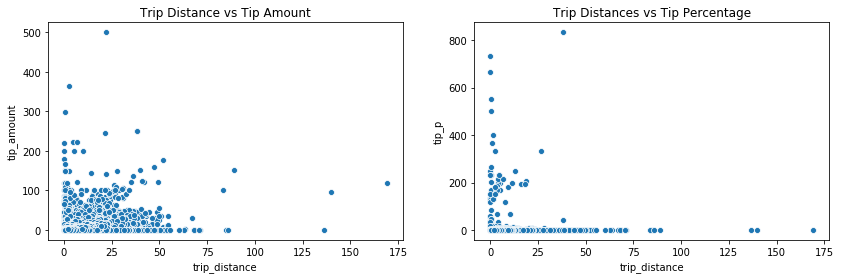

In [12]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.scatterplot('trip_distance', 'tip_amount', data = df)
plt.title('Trip Distance vs Tip Amount')

plt.subplot(1,2,2)
sns.scatterplot('trip_distance', 'tip_p', data = df)
plt.title('Trip Distances vs Tip Percentage')
plt.show()

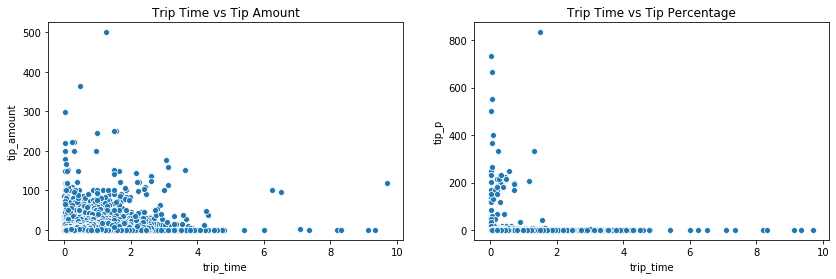

In [13]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.scatterplot('trip_time', 'tip_amount', data = df)
plt.title('Trip Time vs Tip Amount')

plt.subplot(1,2,2)
sns.scatterplot('trip_time', 'tip_p', data = df)
plt.title('Trip Time vs Tip Percentage')
plt.show()

###  Most of the points seem to be concentrated at the bottom left corner, indicating low trip times and low tip amounts, which makes sense since the majority of the taxi rides will be shorts rides with a low fare total, leading to generally loser tips.  Most of the higher tip amounts, however, do seem to happen for lower trip times and distances (Less and less points the more we look towards the upper right)

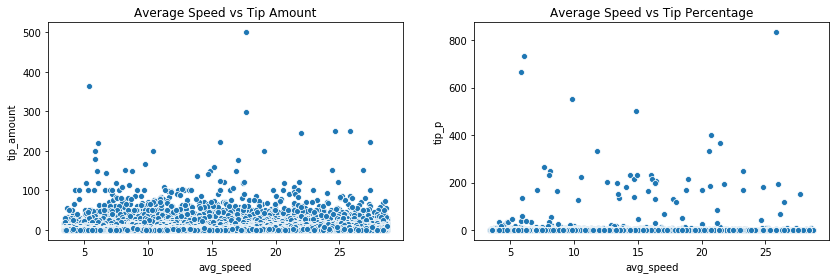

In [14]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.scatterplot('avg_speed', 'tip_amount', data = df)
plt.title('Average Speed vs Tip Amount')

plt.subplot(1,2,2)
sns.scatterplot('avg_speed', 'tip_p', data = df)
plt.title('Average Speed vs Tip Percentage')
plt.show()

### In contrast to the tip in relation to trip distance and time, there doesn't seem to be any clear pattern in relation to the average speed.

Text(0.5, 1.0, 'Temperature vs Tip Percentage')

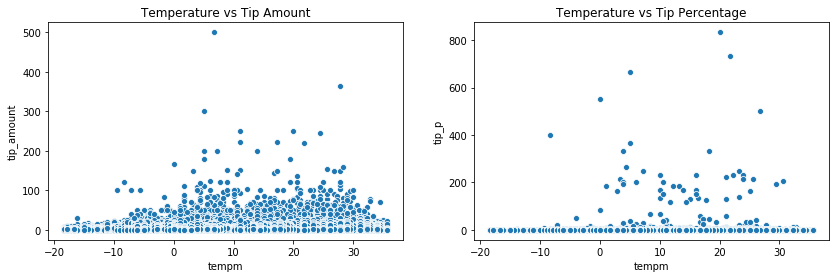

In [15]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.scatterplot('tempm', 'tip_amount', data = df)
plt.title('Temperature vs Tip Amount')

plt.subplot(1, 2, 2)
sns.scatterplot('tempm', 'tip_p', data = df)
plt.title('Temperature vs Tip Percentage')


### Instances of higher tip amounts seem to occur during the warmer days.

Text(0.5, 1.0, 'Precipitation vs Tip Percentage')

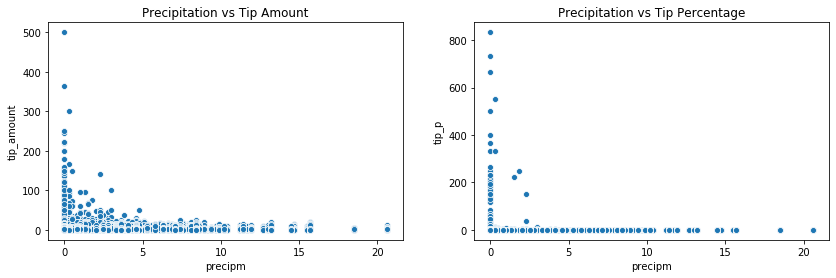

In [16]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.scatterplot('precipm', 'tip_amount', data = df)
plt.title('Precipitation vs Tip Amount')

plt.subplot(1, 2, 2)
sns.scatterplot('precipm', 'tip_p', data = df)
plt.title('Precipitation vs Tip Percentage')


Text(0.5, 1.0, 'Wind Speed vs Tip Percentage')

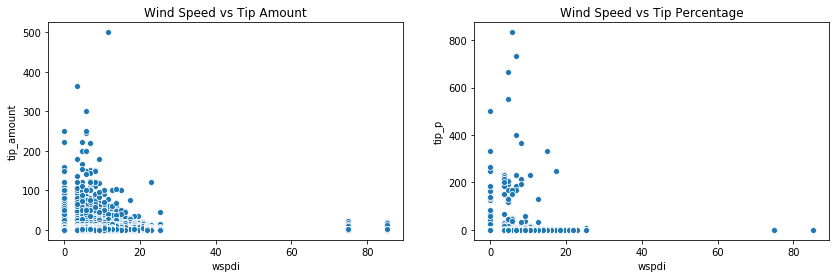

In [17]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.scatterplot('wspdi', 'tip_amount', data = df)
plt.title('Wind Speed vs Tip Amount')

plt.subplot(1, 2, 2)
sns.scatterplot('wspdi', 'tip_p', data = df)
plt.title('Wind Speed vs Tip Percentage')


### Taxi rides with higher trips look like they happen during instances of lower precipitation (no points in the upper right corner)

Text(0, 0.5, 'Average Speed')

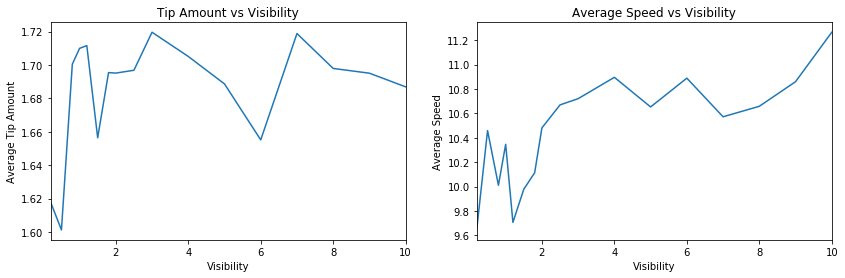

In [18]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.visi)['tip_amount'].mean().plot()
plt.title('Tip Amount vs Visibility')
plt.xlabel('Visibility')
plt.ylabel('Average Tip Amount')

plt.subplot(1,2,2)
df.groupby(df.visi)['avg_speed'].mean().plot()
plt.title('Average Speed vs Visibility')
plt.xlabel('Visibility')
plt.ylabel('Average Speed')

### The average speed for times of lower visibility tend to be lower, but it is unclear if there is a relationship between the average tip amount and the visibility.

In [19]:
rain = df[df.rain == 1]
snow = df[df.snow == 1]
clear = df[(df.rain == 0) & (df.snow == 0)]

clear:  1.6910700333607267
rain:  1.6845224276242978
snow:  1.605545469921618


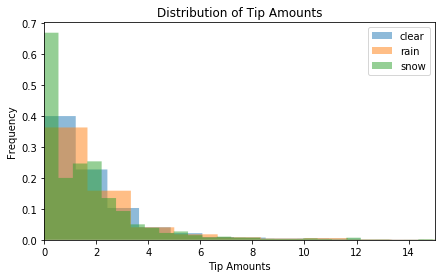

In [20]:
plt.figure(figsize = (7,4))
plt.hist(clear.tip_amount, bins = 300, density = True, alpha = 0.5, histtype = 'stepfilled')
plt.hist(rain.tip_amount, bins = 300, density = True, alpha = 0.5, histtype = 'stepfilled')
plt.hist(snow.tip_amount, bins = 300, density = True, alpha = 0.5, histtype = 'stepfilled')

plt.xlim(0,15)
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amounts')
plt.ylabel('Frequency')
plt.legend(['clear', 'rain', 'snow'])
print('clear: ', np.mean(clear.tip_amount))
print('rain: ', np.mean(rain.tip_amount))
print('snow: ', np.mean(snow.tip_amount))


### There doesn't seem to be an obvious pattern here, but the mean tip amount for taxi rides during snow weather is lower than when it is raining and when it is clear.

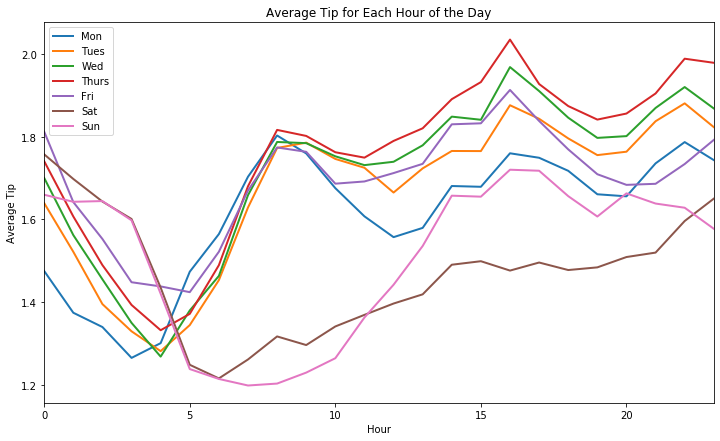

In [22]:
plt.figure(figsize = (12,7))    
for i in range(0,7):
    df.groupby(df.weekday).get_group(i).groupby(df.hour)['tip_amount'].mean().plot(linewidth = 2)
plt.title('Average Tip for Each Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Tip')
plt.legend(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], fontsize = 'medium')
plt.show()

### From this plot we can see that the average tip amount drops way down at around 4am, and picks up again at around 8am, peaking at around 4pm.  This seems to make sense, since you would expect more people to be in a hurry using taxi cabs during the work day.  We can also see that the average tip amount is generally lower on saturday and sunday for most of the day.  This trend is most clearly observed at around 8am.

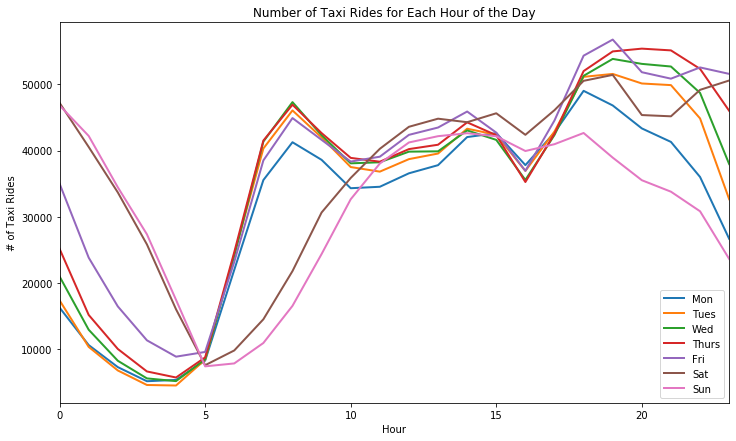

In [23]:
plt.figure(figsize = (12,7))
for i in range(0,7):
    df.groupby(df.weekday).get_group(i).groupby(df.hour).hour.count().plot(linewidth = 2)
plt.title('Number of Taxi Rides for Each Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('# of Taxi Rides')
plt.legend(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], fontsize = 'medium')
plt.show()

### The number of taxi rides seems to mirror the typical work day.  Higher at around 8am, peaking around dinner time, with a sharp drop in volume late into the night at around 2 or 3am.

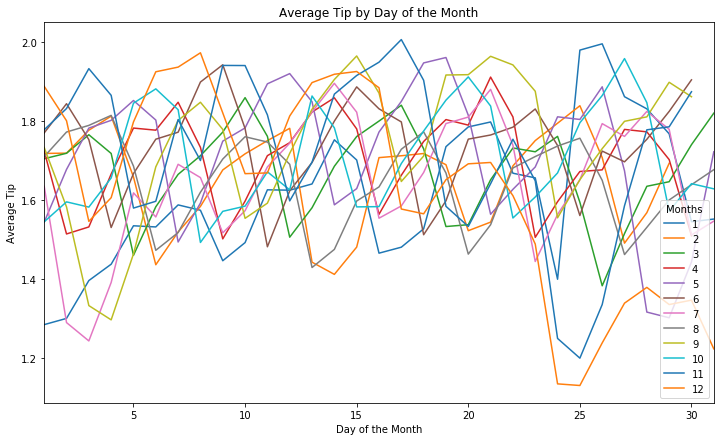

In [24]:
plt.figure(figsize = (12,7))
for i in range(1,13):
    df.groupby(df.month).get_group(i).groupby(df.day)['tip_amount'].mean().plot()
plt.legend(range(1,13,1), title = 'Months')
plt.xlabel('Day of the Month')
plt.ylabel('Average Tip')
plt.title('Average Tip by Day of the Month')
plt.show()

### This plot appears to be messy with no clear patterns, suggesting that the average tips for the days of the month do not vary much month to month.  The only thing of note is that at around the 25th of both November and December, the average tip amount drops significantly.  It does not seem like a coincidence that these coincide with Thanksgiving and Christmas.

0         43
1    4688251
2     785958
3     200417
4     111098
5       3120
6       1207
7          4
9          2
Name: passenger_count, dtype: int64


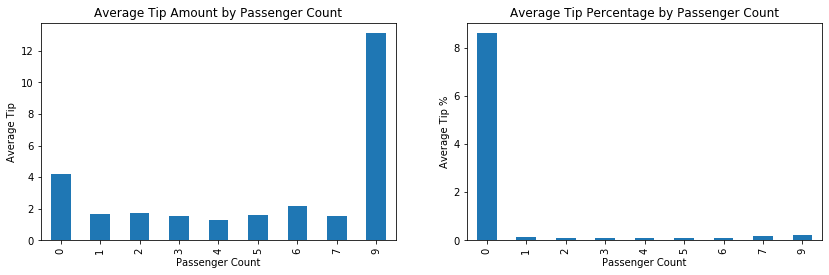

In [25]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.passenger_count)['tip_amount'].mean().plot(kind = 'bar')
plt.title('Average Tip Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip')

plt.subplot(1,2,2)
df.groupby(df.passenger_count)['tip_p'].mean().plot(kind = 'bar')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip %')

print(df.passenger_count.value_counts().sort_index())

### Something strange seems to be going on with the tip percentage of rides with a passenger count of 0.  Also rides with a passenger count of 7 and 9 only occur 4 and 2 times respectively, so maybe excluding them will provide a clearer picture.

Text(0, 0.5, 'Average Tip %')

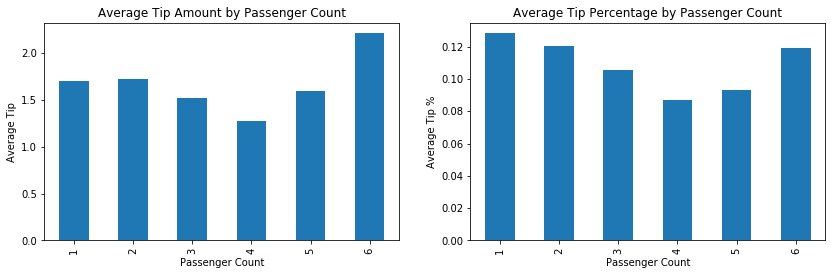

In [26]:
df_ = df[(df.passenger_count != 0) & (df.passenger_count != 7) & (df.passenger_count != 9)]

plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df_.groupby(df_.passenger_count)['tip_amount'].mean().plot(kind = 'bar')
plt.title('Average Tip Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip')

plt.subplot(1,2,2)
df_.groupby(df_.passenger_count)['tip_p'].mean().plot(kind = 'bar')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip %')

### These plots seem to make a little more sense, with big groups providing on average a bigger tip amount, and single passengers offering a higher average tip percentage.

Text(0, 0.5, 'Average Tip %')

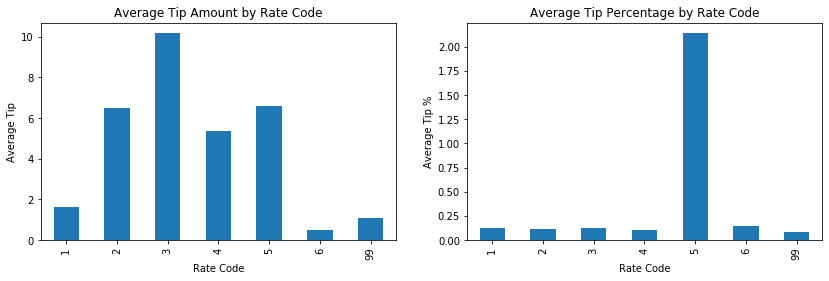

In [27]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.RatecodeID)['tip_amount'].mean().plot(kind = 'bar')
plt.title('Average Tip Amount by Rate Code')
plt.xlabel('Rate Code')
plt.ylabel('Average Tip')

plt.subplot(1,2,2)
df.groupby(df.RatecodeID)['tip_p'].mean().plot(kind = 'bar')
plt.title('Average Tip Percentage by Rate Code')
plt.xlabel('Rate Code')
plt.ylabel('Average Tip %')


Text(0, 0.5, 'Average Trip Distances')

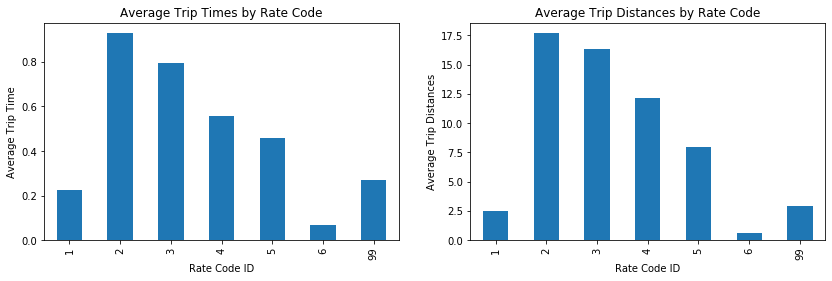

In [28]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.RatecodeID)['trip_time'].mean().plot(kind = 'bar')
plt.title('Average Trip Times by Rate Code')
plt.xlabel('Rate Code ID')
plt.ylabel('Average Trip Time')

plt.subplot(1,2,2)
df.groupby(df.RatecodeID)['trip_distance'].mean().plot(kind = 'bar')
plt.title('Average Trip Distances by Rate Code')
plt.xlabel('Rate Code ID')
plt.ylabel('Average Trip Distances')

### The rate codes may provide some more insight into the tipping practices of taxi cab riders.
### 1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride
### From these plots we can see that rides with codes 1 and 6 generally end up with a lower tip amount, however it seems to be mostly related to trips with code 1 and 6 having generally lower trip times and distances.
### Rate Code 5, negotiated fares, seem to have unspectacular average tip amounts, however the tip percentage is much higher.  This somewhat makes sense, since if a passenger has negotiated a lower fare they might still tip the same they would normally, which would increase the tip percentage.

Text(0.5, 1.0, 'Average Tip % for Weather Conditions')

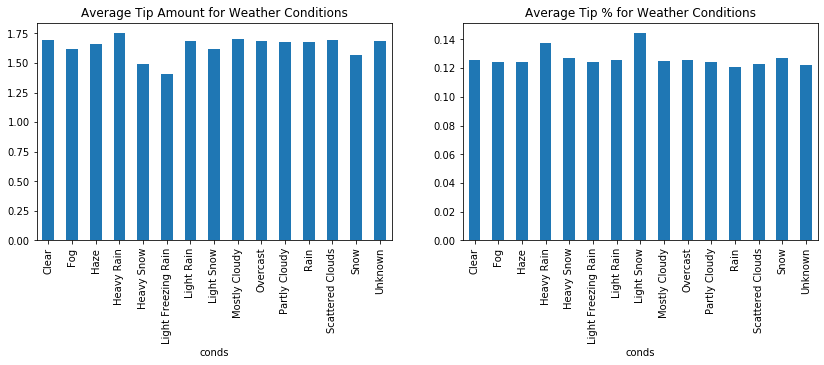

In [29]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.conds)['tip_amount'].mean().plot(kind = 'bar')
plt.title('Average Tip Amount for Weather Conditions')

plt.subplot(1,2,2)
df.groupby(df.conds)['tip_p'].mean().plot(kind = 'bar')
plt.title('Average Tip % for Weather Conditions')

Text(0.5, 1.0, 'Average Trip Time for Weather Conditions')

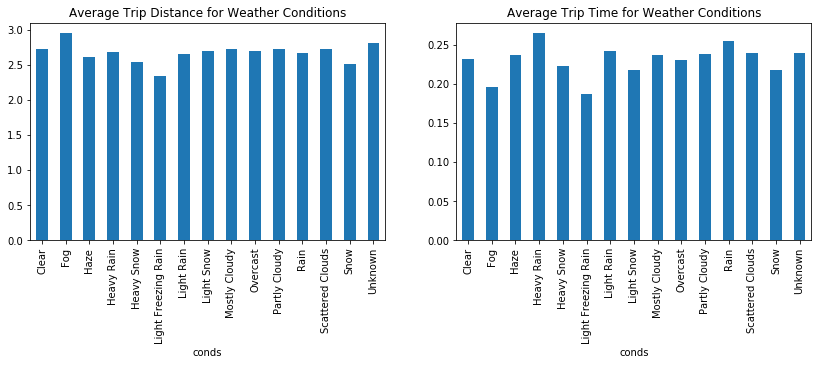

In [30]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.conds)['trip_distance'].mean().plot(kind = 'bar')
plt.title('Average Trip Distance for Weather Conditions')

plt.subplot(1,2,2)
df.groupby(df.conds)['trip_time'].mean().plot(kind = 'bar')
plt.title('Average Trip Time for Weather Conditions')

### From these plots, the most striking observation is that tip amounts tend to be lower during times of heavy snow and freezing rain.  This could be explained by the average trip time and distances being lower during times of freezing rain.  It does not seem to be the case for heavy snow however.